In [28]:
import pandas as pd 
import numpy as np 
import XGBClassifier

ModuleNotFoundError: No module named 'XGBClassifier'

In [5]:
complaints_data = pd.read_csv('/Users//dishankgaglani/Downloads/complaints_25Nov21.csv')

In [6]:
complaints_data

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,No,418647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,No,118351
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


In [7]:
complaints_data.groupby(['Product']).count()

,Date received,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Product,,,,,,,,,,,,,,,,,
Bank account or service,44594,44594,44594,0,7677,15527,44594,43726,42101,6094,12674,44594,44594,44594,44594,44594,44594
Consumer Loan,5508,5508,5508,0,1065,1905,5508,5473,5190,966,1831,5508,5508,5508,5508,5508,5508
Credit card,42191,0,42191,0,8494,14236,42191,41802,39704,6440,14460,42191,42191,42191,42191,42191,42191
Credit reporting,741,0,741,741,130,328,741,737,708,110,345,741,741,741,741,741,741
Debt collection,7861,7861,7861,7861,1518,3002,7861,7807,7458,1340,2878,7861,7861,7861,7861,7861,7861
Money transfers,869,869,869,0,219,309,869,808,755,149,368,869,869,869,869,869,869
Mortgage,101680,101680,101680,0,9516,21749,101680,100936,98458,12828,17372,101680,101680,101680,101680,101680,101680
Other financial service,232,232,232,0,32,127,232,221,217,45,84,232,232,232,232,232,232
Payday loan,83,0,83,0,18,45,83,78,75,21,46,83,83,83,83,83,83


In [7]:
complaints_data.groupby(['Tags']).count()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Tags,,,,,,,,,,,,,,,,,
Older American,18554,18554,13579,18554,799,3590,6200,18554,18365,17414,5781,18554,18554,18554,18554,18554,18554
"Older American, Servicemember",2380,2380,1944,2380,153,305,852,2380,2359,2274,475,2380,2380,2380,2380,2380,2380
Servicemember,7331,7331,6171,7331,627,1260,2237,7331,7273,6954,2011,7331,7331,7331,7331,7331,7331


In [8]:
complaints_data.isnull().sum()

Date received                        0
Product                              0
Sub-product                      43015
Issue                                0
Sub-issue                       196913
Consumer complaint narrative    177869
Company public response         148802
Company                              0
State                             2194
ZIP code                          9286
Tags                            178995
Consumer consent provided?      155947
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [18]:
complaints_data.groupby(['Issue']).count()

,Date received,Product,Sub-product,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Issue,,,,,,,,,,,,,,,,,
APR or interest rate,2909,2909,0,0,380,634,2909,2885,2794,476,614,2909,2909,2909,2909,2909,2909
"Account opening, closing, or management",19762,19762,19762,0,3438,7649,19762,19317,18514,2843,5924,19762,19762,19762,19762,19762,19762
Account terms and changes,193,193,193,0,1,23,193,191,191,29,3,193,193,193,193,193,193
Adding money,7,7,7,0,2,3,7,7,6,1,3,7,7,7,7,7,7
Advertising and marketing,1374,1374,8,0,406,524,1374,1368,1288,183,634,1374,1374,1374,1374,1374,1374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unauthorized transactions/trans. issues,209,209,209,0,69,149,209,207,188,27,126,209,209,209,209,209,209
Unexpected/Other fees,17,17,17,0,2,13,17,17,17,2,5,17,17,17,17,17,17
Unsolicited issuance of credit card,806,806,0,0,210,336,806,796,741,122,354,806,806,806,806,806,806


In [19]:
cleaned_data= complaints_data.drop(columns=['Date received','Complaint ID','Consumer consent provided?','Company public response','Consumer complaint narrative','Tags','Sub-issue','Date sent to company'],axis=1)

In [20]:
print(cleaned_data.shape)
cleaned_data.isnull().sum()

(207260, 10)


Product                             0
Sub-product                     43015
Issue                               0
Company                             0
State                            2194
ZIP code                         9286
Submitted via                       0
Company response to consumer        0
Timely response?                    0
Consumer disputed?                  0
dtype: int64

In [21]:
cleaned_data.dropna(axis=0,inplace=True)

In [22]:
cleaned_data

,Product,Sub-product,Issue,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
1,Bank account or service,Other bank product/service,"Account opening, closing, or management","CITIBANK, N.A.",PA,151XX,Web,Closed with explanation,Yes,No
2,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",U.S. BANCORP,PA,152XX,Web,Closed with monetary relief,Yes,No
3,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",JPMORGAN CHASE & CO.,VA,22406,Phone,Closed with explanation,Yes,Yes
4,Mortgage,Other mortgage,"Loan modification,collection,foreclosure","BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,Referral,Closed with explanation,Yes,No
5,Mortgage,Other mortgage,"Loan modification,collection,foreclosure","BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,Referral,Closed with explanation,Yes,No
...,...,...,...,...,...,...,...,...,...,...
207255,Debt collection,Credit card,Taking/threatening an illegal action,JPMORGAN CHASE & CO.,FL,33133,Web,Closed with explanation,Yes,No
207256,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",JPMORGAN CHASE & CO.,NY,10312,Referral,Closed without relief,Yes,Yes
207257,Student loan,Non-federal student loan,Repaying your loan,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,Web,Closed with explanation,Yes,No
207258,Bank account or service,Checking account,"Account opening, closing, or management","CITIBANK, N.A.",CA,900XX,Web,Closed with non-monetary relief,Yes,No


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
Y= encoder.fit_transform(cleaned_data['Consumer disputed?'])

In [24]:
cleaned_data= cleaned_data.drop(['Consumer disputed?'],axis=1)
print(cleaned_data)
X= pd.get_dummies(cleaned_data)
X

                        Product                  Sub-product  \
1       Bank account or service   Other bank product/service   
2       Bank account or service   Other bank product/service   
3                      Mortgage  Conventional fixed mortgage   
4                      Mortgage               Other mortgage   
5                      Mortgage               Other mortgage   
...                         ...                          ...   
207255          Debt collection                  Credit card   
207256                 Mortgage  Conventional fixed mortgage   
207257             Student loan     Non-federal student loan   
207258  Bank account or service             Checking account   
207259                 Mortgage  Conventional fixed mortgage   

                                           Issue  \
1        Account opening, closing, or management   
2       Making/receiving payments, sending money   
3       Application, originator, mortgage broker   
4       Loan modificati

,Product_Bank account or service,Product_Consumer Loan,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Prepaid card,Product_Student loan,Sub-product_(CD) Certificate of deposit,Sub-product_Auto,...,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes
1,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
207256,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
207257,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
207258,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, shuffle=True)

In [ ]:
# X_train_final, X_valid, y_train_final, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42, shuffle=True)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score 
# model = LogisticRegression(max_iter=300)
# model.fit(X, Y)



In [ ]:
# predicted_classes = model.predict(X)


In [ ]:
# accuracy = accuracy_score(Y,predicted_classes)

In [ ]:
# print(accuracy)

In [26]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [27]:
pred = model_xgb.predict(X_test)

NameError: name 'model_xgb' is not defined

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     37031
           1       0.72      0.01      0.01     10214

    accuracy                           0.78     47245
   macro avg       0.75      0.50      0.45     47245
weighted avg       0.77      0.78      0.69     47245



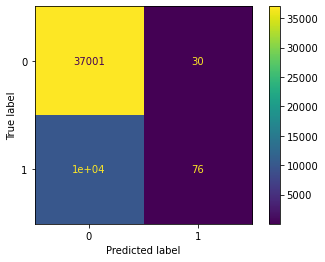

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_true = y_test, y_pred = pred))

cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [17]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')


model_xgb.fit(X_train_smote, y_train_smote)

[15:41:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
pred = model_xgb.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_true = y_test, y_pred = pred))

cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
print(X_train.shape)

In [ ]:
print(y_train.shape)

In [ ]:
X_test.shape

In [ ]:
y_test.shape